This notebook seeks to create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, you will determine what it takes to be one of the best tennis players in the world.

The data is about the top 1500 ranked players in the ATP over the span of 2009 to 2017.The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.


### Identifying Data
- Player: name of the tennis player
- Year: year data was recorded


#### Service Game Columns (Offensive)
- Aces: number of serves by the player where the receiver does not touch the ball
- DoubleFaults: number of times player missed both first and second serve attempts
- FirstServe: % of first-serve attempts made
- FirstServePointsWon: % of first-serve attempt points won by the player
- SecondServePointsWon: % of second-serve attempt points won by the player
- BreakPointsFaced: number of times where the receiver could have won service game of the player
- BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ServiceGamesPlayed: total number of games where the player served
- ServiceGamesWon: total number of games where the player served and won
- TotalServicePointsWon: % of points in games where the player served that they won


#### Return Game Columns (Defensive)
- FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
- SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
- BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
- BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
- ReturnGamesPlayed: total number of games where the player’s opponent served
- ReturnGamesWon: total number of games where the player’s opponent served and the player won
- ReturnPointsWon: total number of points where the player’s opponent served and the player won
- TotalPointsWon: % of points won by the player


#### Outcomes
- Wins: number of matches won in a year
- Losses: number of matches lost in a year
- Winnings: total winnings in `$ USD($) $` in a year
- Ranking: ranking at the end of year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
tennis = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/tennis_stats.csv')
print(tennis.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [3]:
tennis[tennis['Ranking'] == 3]

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
1332,Marin Cilic,2013,0.56,0.76,0.30,0.56,0.52,301,0.42,213,...,0.24,0.38,458,0.84,0.52,0.67,26,12,639368,3
1510,Marin Cilic,2011,0.54,0.76,0.31,0.54,0.50,436,0.43,326,...,0.24,0.38,727,0.83,0.52,0.66,44,22,1052754,3


In [4]:
corr_matrix = tennis.corr()

#### Exploratory Data Analysis

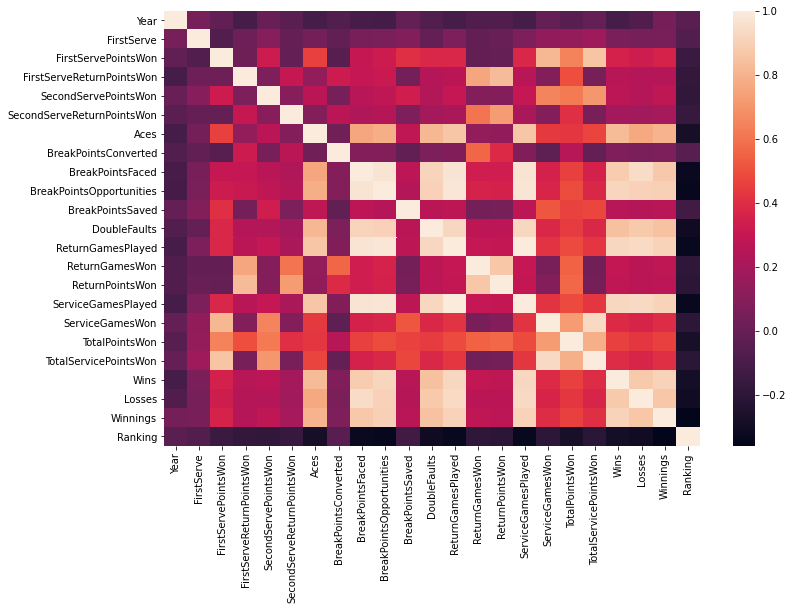

In [5]:
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix)
plt.show()

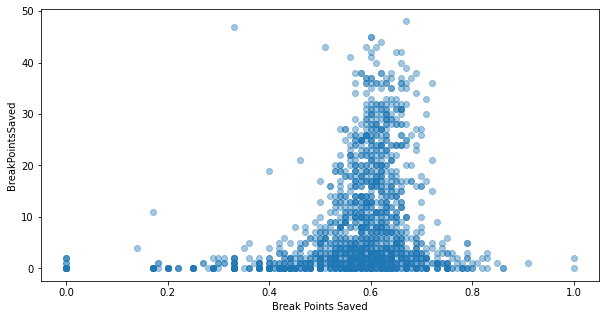

In [24]:
plt.figure(figsize = (10, 5))
plt.scatter(tennis['BreakPointsSaved'], tennis['Wins'], alpha = 0.4)
plt.xlabel('Break Points Saved')
plt.ylabel('BreakPointsSaved')
plt.show()

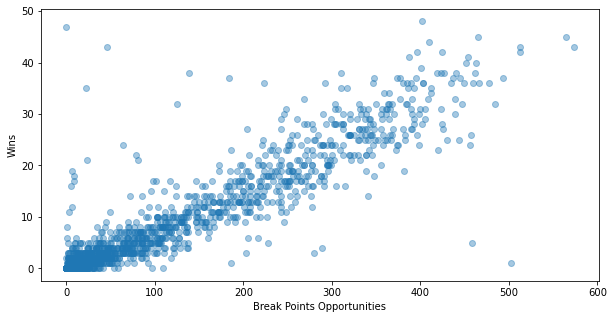

In [25]:
plt.figure(figsize = (10, 5))
plt.scatter(tennis['BreakPointsOpportunities'], tennis['Wins'], alpha = 0.4)
plt.xlabel('Break Points Opportunities')
plt.ylabel('Wins')
plt.show()

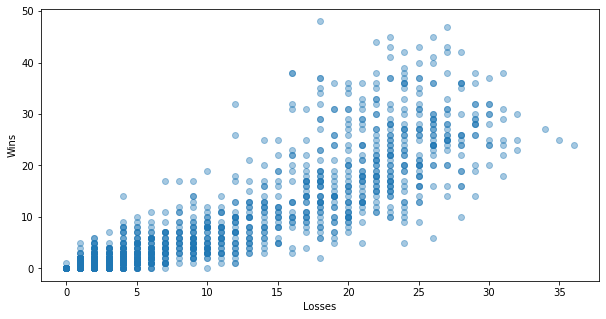

In [26]:
plt.figure(figsize = (10, 5))
plt.scatter(tennis['Losses'], tennis['Wins'], alpha = 0.4)
plt.xlabel('Losses')
plt.ylabel('Wins')
plt.show()

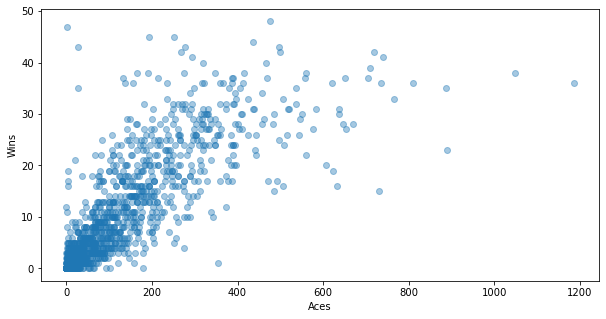

In [27]:
plt.figure(figsize = (10, 5))
plt.scatter(tennis['Aces'], tennis['Wins'], alpha = 0.4)
plt.xlabel('Aces')
plt.ylabel('Wins')
plt.show()

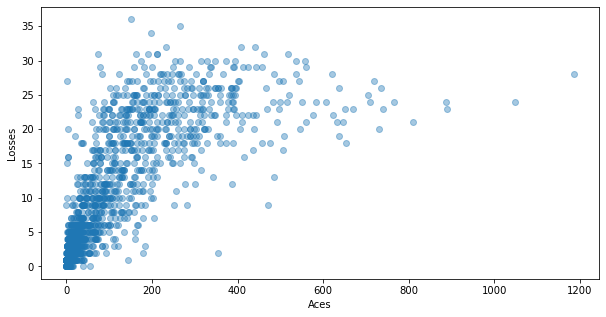

In [28]:
plt.figure(figsize = (10, 5))
plt.scatter(tennis['Aces'], tennis['Losses'], alpha = 0.4)
plt.xlabel('Aces')
plt.ylabel('Losses')
plt.show()

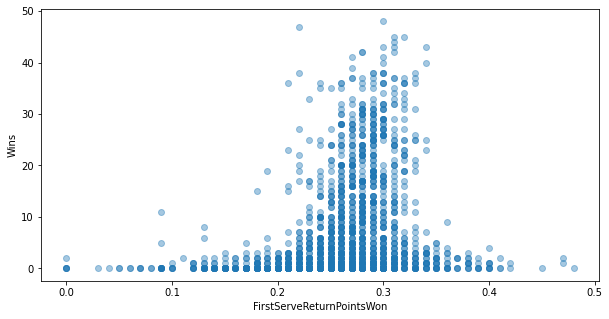

In [29]:
plt.figure(figsize = (10, 5))
plt.scatter(tennis['FirstServeReturnPointsWon'], tennis['Wins'], alpha = 0.4)
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Wins')
plt.show()

#### Single Feature Regression

In [18]:
feature = tennis[['BreakPointsOpportunities']]
wins = tennis[['Wins']]

#Splitting the data
feature_train, feature_test, wins_train, wins_test = train_test_split(feature, wins, test_size = 0.30, random_state = 123)

model = LinearRegression()

model.fit(feature_train, wins_train)

print('Pridicting wins, given Break Points Opportunities', model.score(feature_test, wins_test))

wins_prediction = model.predict(feature_test)

Pridicting wins, given Break Points Opportunities 0.8937853645119525


In [19]:
model.coef_

array([[0.07555204]])